# Session 24 Advanced Matplotlib

## Session Introduction

In this session, we move beyond the fundamentals of Matplotlib and focus on **advanced techniques and visualisation strategies** that are commonly used in real-world data analysis and data science workflows.

The objective of this session is to gain deeper control over plots, improve visual storytelling, and learn how to represent complex data more effectively.

### What we will learn in this session

* **Advanced Matplotlib techniques and tricks**
  We will explore more flexible and powerful ways of working with Matplotlib, allowing better control over layout, styling, and structure of plots.

* **Subplots**
  We will learn how to create multiple plots within a single figure using subplots. This is especially useful when comparing multiple variables or visualising related data side-by-side.

* **Additional types of plots**
  Apart from the basic plots, we will explore more advanced plot types, with a special focus on:

  * **3D plots** for visualising data across three dimensions.
  * Use cases where 3D visualisation is meaningful and when it should be avoided.

* **Contour plots**
  We will study contour plots, which are commonly used to represent three-dimensional data in a two-dimensional plane using contour lines. These are widely used in scientific and engineering applications.

* **Heatmaps**
  Heatmaps are used to visualise data intensity, correlation, or magnitude using color gradients. We will understand how they work and where they are most effective.

* **`DataFrame.plot()` in depth**
  We will explore Pandas’ built-in plotting functionality (`DataFrame.plot`) and understand:

  * How it internally uses Matplotlib
  * When it is convenient to use
  * Its limitations compared to direct Matplotlib usage

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Scatter Plot (Iris Dataset)

In this example, we are working with the **popular Iris dataset**, which contains measurements of different flower species such as sepal length, sepal width, petal length, and petal width, along with the species name.

Before plotting, we perform a small but important transformation on the `Species` column:

```python
iris['Species'] = iris['Species'].replace({
    'Iris-virginica': 0,
    'Iris-versicolor': 1,
    'Iris-setosa': 2
})
iris['Species'].sample(5)
```

Here, we are **mapping categorical species names to numerical values**. This is necessary because the `c` parameter of a scatter plot expects **numeric values**, which are then converted into colors using a color mapping (RGBA colorizer).

### New concepts in the scatter plot code

```python
plt.scatter(
    iris['SepalLengthCm'],
    iris['PetalLengthCm'],
    c=iris['Species'],
    cmap='summer',
    alpha=0.9
)
plt.xlabel("Sepal Length Cm")
plt.ylabel("Petal Length Cm")
plt.colorbar()
```

Only the **new and important parameters** here are:

* **`c=iris['Species']`**
  This parameter assigns colors to each data point based on the numerical values in the `Species` column. Each species gets a different color.

* **`cmap='summer'`**
  The `cmap` (colormap) parameter defines how numeric values are translated into colors. The `'summer'` colormap produces a smooth gradient of colors, making it easier to visually distinguish between species.

* **`alpha=0.9`**
  This controls the **transparency** of the points. A value close to `1` makes points nearly opaque, while lower values make them more transparent. This is useful when points overlap.

* **`plt.colorbar()`**
  Adds a color scale beside the plot, helping interpret which color corresponds to which species value.

---

## Plot Size Customization

```python
plt.figure(figsize=(8, 6))
```

The size of a plot can be customized using the `figsize` parameter.
Here:

* `8` represents the **width**
* `6` represents the **height**

Both values are measured in **inches**. Adjusting the figure size is especially useful when working with dense data or when preparing plots for presentations or reports.


In [2]:
iris = pd.read_csv("datasets/iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris["Species"] = iris["Species"].replace(
    {"Iris-virginica": 0, "Iris-versicolor": 1, "Iris-setosa": 2}
)
iris["Species"].sample(5)

/tmp/ipykernel_3229/3314183652.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris["Species"] = iris["Species"].replace(


73     1
140    0
147    0
52     1
143    0
Name: Species, dtype: int64

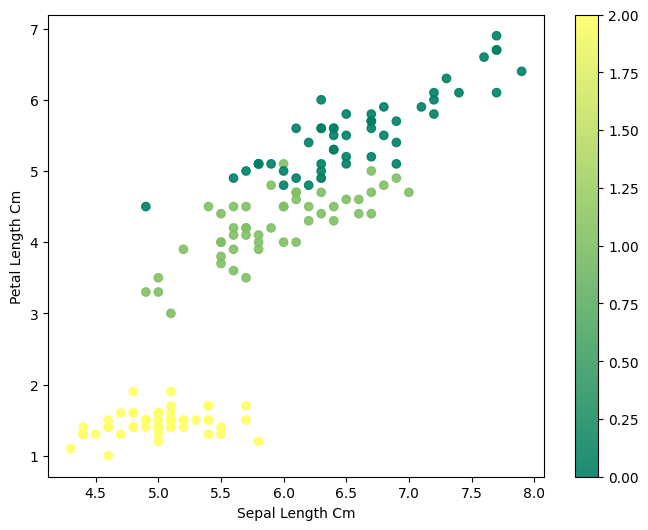

In [4]:
plt.figure(figsize=(8, 6))  # customizing plot size

plt.scatter(
    iris["SepalLengthCm"],
    iris["PetalLengthCm"],
    c=iris["Species"],
    cmap="summer",
    alpha=0.9,
)
plt.xlabel("Sepal Length Cm")
plt.ylabel("Petal Length Cm")
plt.colorbar()

## Labelling Individual Points in a Scatter Plot

In some situations, data points **do not belong to well-defined classes**, and hence using `c`, `cmap`, and `colorbar` is not appropriate. Instead, each point represents a **distinct entity** that must be identified individually.
In this case, each point represents a **batsman**, and we want to label every point with the batsman’s name.

The dataset used here contains the following columns:

* `batter` – name of the batsman
* `runs` – total runs scored
* `avg` – batting average
* `strike_rate` – strike rate

### Sampling the data

```python
batters = pd.read_csv("datasets/batter.csv")
batters

# randomly choosing 25 tuples from the top 100 rows
batter_sample_df = batters.head(100).sample(25, random_state=5)
batter_sample_df
```

* First, the dataset is read into a DataFrame.
* From the **top 100 rows**, a **random sample of 25 rows** is selected.
* The `random_state` parameter ensures **reproducibility**, meaning the same 25 rows will be selected every time the code is run.

### Creating the scatter plot

```python
plt.figure(figsize=(12, 8))
plt.scatter(
    batter_sample_df['avg'],
    batter_sample_df['strike_rate'],
    s=batter_sample_df['runs']
)
```

* `avg` is plotted on the **x-axis** and `strike_rate` on the **y-axis**.
* The `s` parameter controls the **size of each point (bubble)**.
* Here, `s=batter_sample_df['runs']` means:

  * Batsmen who have scored **more runs** are represented by **larger bubbles**.
  * Batsmen with fewer runs have **smaller bubbles**.

This creates a **bubble chart**, where position represents performance metrics and size represents total runs.

### Labelling each data point

```python
for i in range(batter_sample_df.shape[0]):
    plt.text(
        batter_sample_df['avg'].values[i],
        batter_sample_df['strike_rate'].values[i],
        batter_sample_df['batter'].values[i]
    )
```

* This loop iterates over each row in the sampled DataFrame.
* `plt.text(x, y, label)` places a **text label** at the specified `(x, y)` coordinates.
* For each data point:

  * `x` → batting average
  * `y` → strike rate
  * `label` → batsman’s name

As a result:

* **Every data point is explicitly labelled** with the batsman’s name.
* This approach is useful when dealing with a **small number of discrete, important points** where individual identification is required.

### Key takeaway

* This technique allows **manual annotation of each scatter point**.
* Bubble size varies with the `runs` column, making the plot more informative.
* While powerful, this approach should be avoided for very large datasets, as overlapping labels can reduce readability.

In [5]:
batters = pd.read_csv("datasets/batter.csv")
batters

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312
...,...,...,...,...
600,C Nanda,0,0.000000,0.000000
601,Akash Deep,0,0.000000,0.000000
602,S Ladda,0,0.000000,0.000000
603,V Pratap Singh,0,0.000000,0.000000


In [6]:
# randomly choosing 25 tuples from the top 100 rows
batter_sample_df = batters.head(100).sample(25, random_state=5)
batter_sample_df

,batter,runs,avg,strike_rate
66,KH Pandya,1326,22.100000,132.203390
32,SE Marsh,2489,39.507937,130.109775
46,JP Duminy,2029,39.784314,120.773810
28,SA Yadav,2644,29.707865,134.009123
74,IK Pathan,1150,21.698113,116.751269
23,JC Buttler,2832,39.333333,144.859335
10,G Gambhir,4217,31.007353,119.665153
20,BB McCullum,2882,27.711538,126.848592
17,KA Pollard,3437,28.404959,140.457703
35,WP Saha,2427,25.281250,124.397745


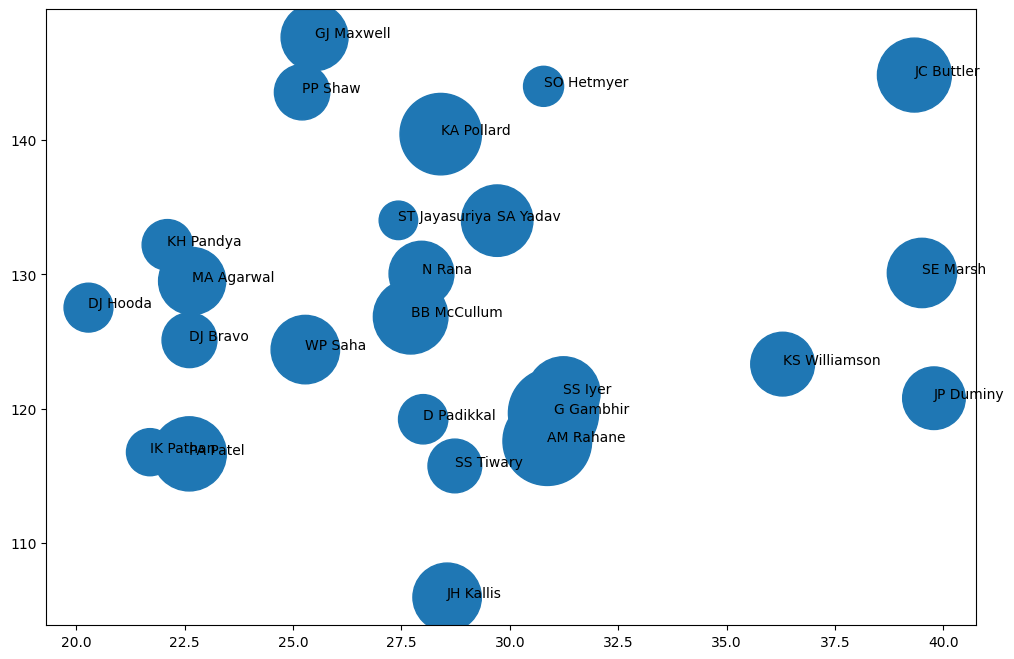

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(
    batter_sample_df["avg"], batter_sample_df["strike_rate"], s=batter_sample_df["runs"]
)

for i in range(batter_sample_df.shape[0]):
    plt.text(
        batter_sample_df["avg"].values[i],
        batter_sample_df["strike_rate"].values[i],
        batter_sample_df["batter"].values[i],
    )

Text(4, 8, 'Point 4')

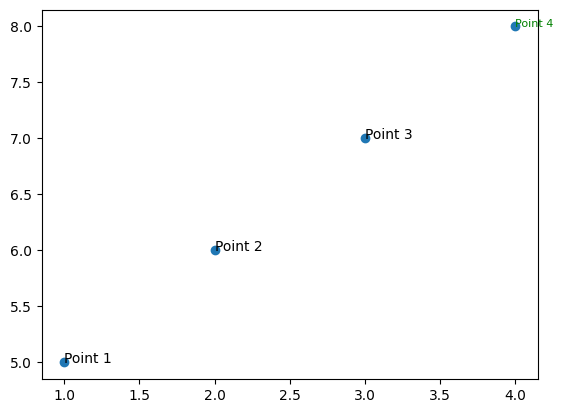

In [8]:
# sample code to try out plt.text
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]

plt.scatter(x, y)
plt.text(1, 5, "Point 1")
plt.text(2, 6, "Point 2")
plt.text(3, 7, "Point 3")
plt.text(4, 8, "Point 4", fontdict={"size": 8, "color": "green"})

## Adding Reference Lines to a Scatter Plot (Graphical Filtering)

Since **strike rate** is plotted on the **y-axis**, we can visually filter batsmen based on a minimum strike rate using a **horizontal reference line**.

### Horizontal filter using `axhline`

```python
plt.axhline(130, color='red')
```

* `axhline()` draws a **horizontal line** across the plot.
* The value `130` represents the **y-coordinate**, i.e. strike rate = 130.
* All points **above this line** represent batsmen with a **strike rate greater than or equal to 130**.

---

### Vertical filter using `axvline`

Now suppose we also want to filter batsmen with a **batting average greater than 30**.

```python
plt.axvline(30, color='blue')
```

* `axvline()` draws a **vertical line** across the plot.
* The value `30` represents the **x-coordinate**, i.e. average = 30.
* All points **to the right of this line** represent batsmen with an **average greater than or equal to 30**.

---

## Understanding the four quadrants

With both a horizontal and a vertical line drawn, the plot is divided into **four quadrants**, each representing a different type of player:

1. **Upper-right quadrant (avg > 30, strike rate > 130)**

   * Batsmen who are **consistent** (high average) and **aggressive** (high strike rate).
   * These are typically the **most valuable and balanced players**.

2. **Upper-left quadrant (avg ≤ 30, strike rate > 130)**

   * Batsmen with **high strike rates but lower averages**.
   * Usually aggressive hitters who score fast but may lack consistency.

3. **Lower-right quadrant (avg > 30, strike rate ≤ 130)**

   * Batsmen with **good consistency** but **slower scoring rates**.
   * Often anchor-type players.

4. **Lower-left quadrant (avg ≤ 30, strike rate ≤ 130)**

   * Batsmen who are **neither very consistent nor very aggressive**.
   * Generally less impactful compared to the others.

---

## Adding multiple reference lines

We are not limited to a single reference line. Multiple horizontal and vertical rules can be drawn to introduce **additional thresholds**.

For example, to highlight batsmen with an **exceptionally high strike rate (> 140)**:

```python
plt.axhline(140, color='green')
```

* This adds another horizontal filter.
* Players above this line are **very high strike-rate batsmen**.

---

## Final combined code

```python
plt.figure(figsize=(12, 8))

# reference lines
plt.axhline(130, color='red')
plt.axvline(30, color='blue')
plt.axhline(140, color='green')

# scatter plot
plt.scatter(
    batter_sample_df["avg"],
    batter_sample_df["strike_rate"],
    s=batter_sample_df["runs"]
)

# labeling each point
for i in range(batter_sample_df.shape[0]):
    plt.text(
        batter_sample_df["avg"].values[i],
        batter_sample_df["strike_rate"].values[i],
        batter_sample_df["batter"].values[i]
    )
```

### Key takeaway

* `axhline()` and `axvline()` are powerful tools for **visual thresholding**.
* They help convert a scatter plot into a **decision-making graph**, where regions of interest are clearly visible.
* This technique is widely used in **performance analysis**, **player profiling**, and **business decision dashboards**.

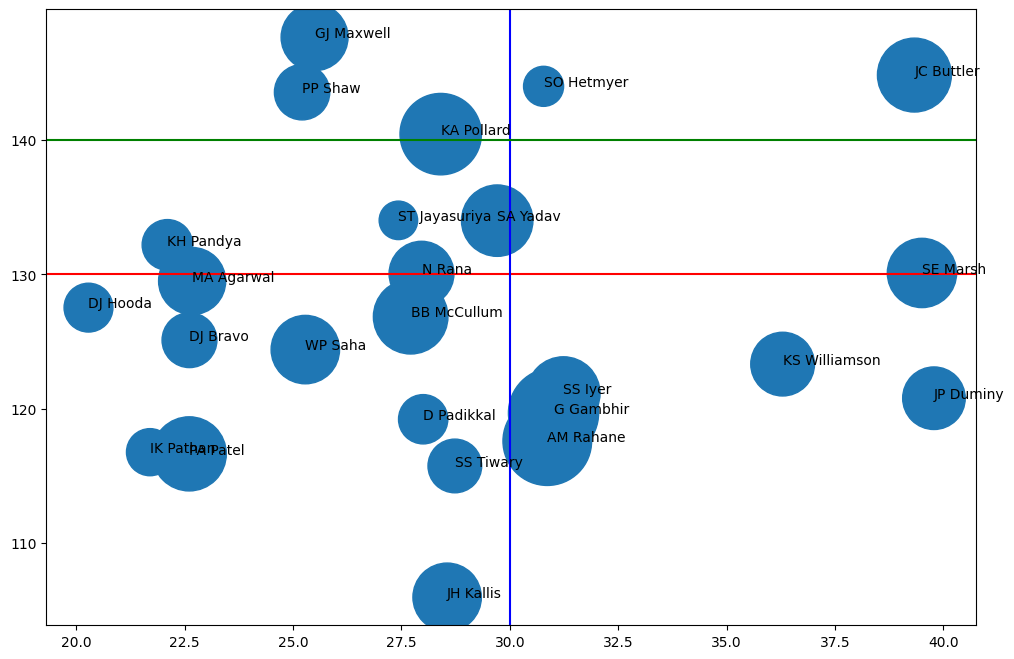

In [9]:
plt.figure(figsize=(12, 8))
plt.axhline(130, color='red')
plt.axvline(30, color='blue')
plt.axhline(140, color='green')

plt.scatter(
    batter_sample_df["avg"], batter_sample_df["strike_rate"], s=batter_sample_df["runs"]
)

for i in range(batter_sample_df.shape[0]):
    plt.text(
        batter_sample_df["avg"].values[i],
        batter_sample_df["strike_rate"].values[i],
        batter_sample_df["batter"].values[i],
    )

## Subplots

### What are subplots?

**Subplots** are multiple plots drawn **within a single figure**, arranged in rows and columns.
They are useful when:

* You have **multiple columns / variables**
* You want to **compare different plots side by side**
* You want all plots to share the **same visual context** (same figure window)

Instead of creating many separate figures, subplots allow you to **organize multiple charts neatly inside one figure**.

---

### A different way to plot graphs

Up until now, we were plotting graphs directly using `plt`:

```python
plt.scatter(batters['avg'], batters['strike_rate'])
```

This approach works well for **simple, single plots**, but it becomes limiting when we want **multiple plots in one figure**.

---

### Object-oriented (OO) way of plotting

Matplotlib also provides an **object-oriented interface**, which is the preferred approach when working with **subplots**.

```python
fig, ax = plt.subplots()

ax.scatter(batters['avg'], batters['strike_rate'])
```

---

### How `plt.subplots()` works

When we run:

```python
fig, ax = plt.subplots()
```

It returns **two objects** (you can verify this yourself):

```
(<Figure size 640x480 with 1 Axes>, <Axes: >)
```

* **Figure (`fig`)**

  * Represents the **entire canvas / window**
  * Controls overall properties like size, layout, and saving the plot

* **Axes (`ax`)**

  * Represents the **actual plotting area**
  * This is where data is plotted (scatter, line, bar, etc.)

Even for a single plot, Matplotlib internally uses **Figure → Axes**, but the OO method makes this explicit.

---

### Why this method is important

The **main reason** for using this approach is **subplots**:

* With multiple axes objects, we can easily place **multiple plots inside one figure**
* Each subplot gets its own `Axes` object
* Much cleaner and more scalable than using `plt` repeatedly

---

### Code differences in this approach

When using the object-oriented style:

* We **do not** use `plt.xlabel()`, `plt.ylabel()`, or `plt.title()`
* Instead, we use methods of the `Axes` object

Example:

```python
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(batters['avg'], batters['strike_rate'])
ax.set_title("Sample Title")
ax.set_xlabel("Avg")
ax.set_ylabel("Strike Rate")

fig.show()
# plt.show()  # would work as well
```

#### Key differences to note:

* `figsize` is passed while creating the figure
* Labels and titles are set using:

  * `ax.set_title()`
  * `ax.set_xlabel()`
  * `ax.set_ylabel()`
* `fig.show()` or `plt.show()` can be used to display the figure

---

### Summary

* **Subplots** allow multiple plots in a single figure for comparison
* `plt.subplots()` returns:

  * a **Figure**
  * one or more **Axes**
* The object-oriented approach is:

  * cleaner
  * more flexible
  * essential for advanced Matplotlib usage

This forms the **foundation** for creating grids of plots, shared axes, and complex visualizations.

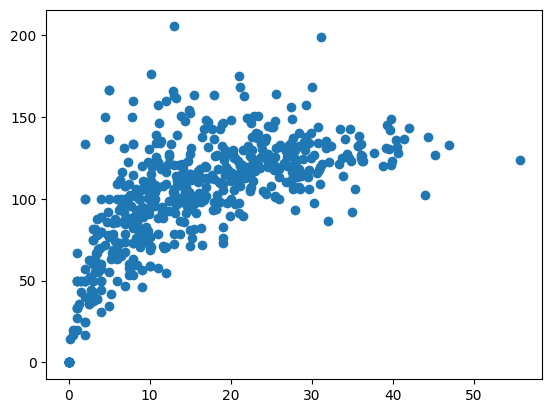

In [10]:
# early method
plt.scatter(batters['avg'], batters['strike_rate'])

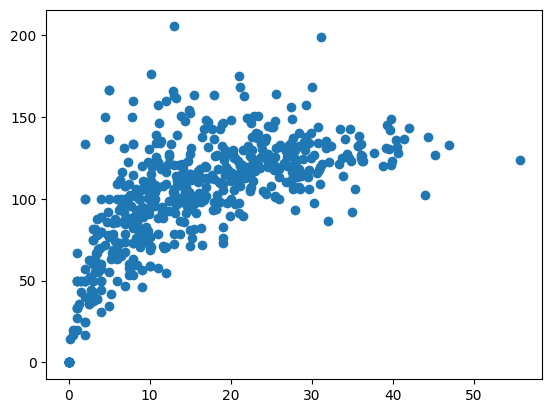

In [11]:
# new method
fig, ax = plt.subplots()

ax.scatter(batters['avg'], batters['strike_rate'])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

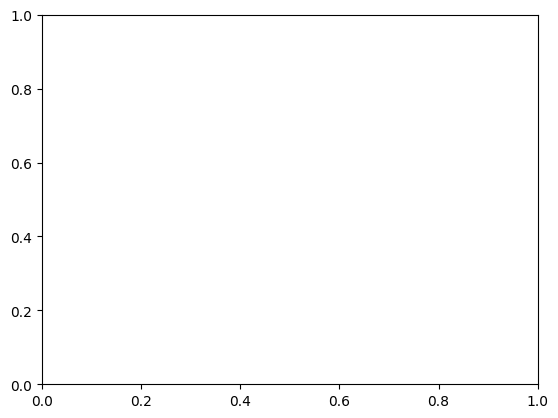

In [12]:
# objects returned by plt.subplots
plt.subplots()

/tmp/ipykernel_3229/3772958373.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


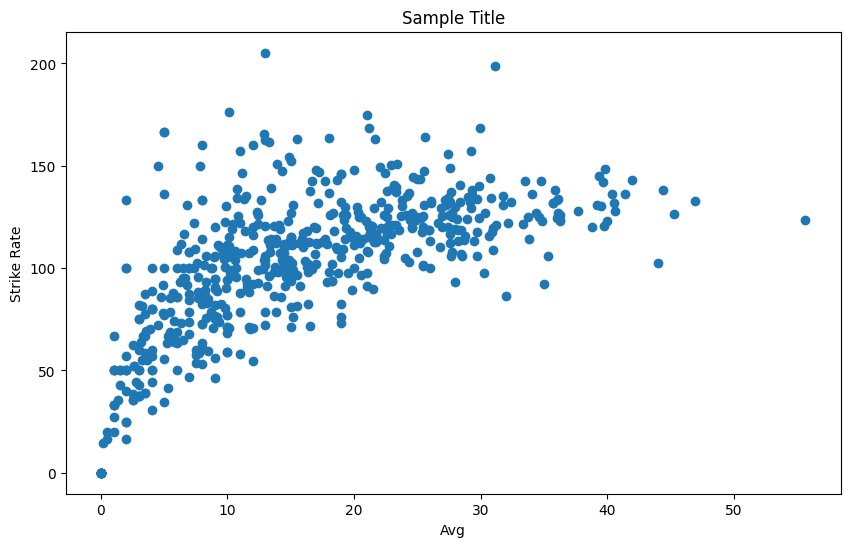

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(batters['avg'], batters['strike_rate'])
ax.set_title("Sample Title")
ax.set_xlabel('Avg')
ax.set_ylabel("Strike Rate")

fig.show()
# plt.show() # would work as well

## Plotting Subplots

### Creating subplots using `plt.subplots()`

When we create subplots using:

```python
plt.subplots(nrows=2, ncols=4)
```

The output looks like:

```
(<Figure size 640x480 with 8 Axes>, array([<Axes: >, <Axes: >, ...], dtype=object))
```

This tells us that:

* There is **one Figure**
* There are **8 Axes objects**
* The axes are arranged as **2 rows × 4 columns**

  * 4 axes in each row

So, even though we see one figure window, internally Matplotlib has created **multiple axes**, one for each subplot.

---

## Working with subplots

Now let’s work with a concrete example:

```python
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax[0].scatter(batters['avg'], batters['strike_rate'], color='green')
ax[1].scatter(batters['avg'], batters['runs'])

ax[0].set_title("Average vs Strike Rate")
ax[0].set_ylabel("Strike Rate")

ax[1].set_title("Average vs Runs")
ax[1].set_xlabel("Average")  # setting common x-label for both the figs
ax[1].set_ylabel("Runs")
```

### Core concept

The most important idea here is:

> **Each subplot is an Axes object, and we can access and style each Axes individually.**

* `ax` is an **array of Axes**
* `ax[0]` refers to the first subplot (top plot)
* `ax[1]` refers to the second subplot (bottom plot)

This gives us the power to:

* Create multiple plots inside one figure
* Access each plot independently
* Customize titles, labels, and styles for each subplot separately

---

### Managing common settings

Some settings apply to **all subplots together**, and these are controlled when calling `plt.subplots()`:

* `figsize=(10, 8)` → controls the size of the entire figure
* `sharex=True` → both subplots share the same x-axis scale

  * This avoids duplicated x-axis ticks
  * Makes comparison easier

Common behavior is defined **once**, while plot-specific styling is done on individual axes.

---

## Creating subplots with different graphs

Now let’s create a grid of subplots:

```python
plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))
```

This returns:

```
(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))
```

### Understanding the Axes structure

* The axes are returned as a **2D array**
* Shape of the array: `2 × 2`
* Each element corresponds to one subplot

So:

* `ax[0][0]` → first row, first column
* `ax[0][1]` → first row, second column
* `ax[1][0]` → second row, first column
* `ax[1][1]` → second row, second column

This indexing directly matches the **visual layout** of the plots.

---

### Creating different types of graphs in subplots

```python
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax[0][0].scatter(batters['avg'], batters['strike_rate'], color='green')
ax[0][1].scatter(batters['avg'], batters['runs'], color='green')
ax[1, 0].hist(batters['avg'])
ax[1, 1].hist(batters['runs'])
```

Here:

* Top row contains **scatter plots**
* Bottom row contains **histograms**
* Each subplot is controlled independently via its corresponding Axes object

This shows how flexible subplots are when mixing different chart types.

---

## Another method for creating subplots using Matplotlib

Apart from `plt.subplots()`, Matplotlib provides another approach using `Figure.add_subplot()`.

```python
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(batters['avg'], batters['strike_rate'], color='green')
ax1.set_xlabel("Average")
ax1.set_ylabel("Strike Rate")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(batters['runs'])
```

### How this method works

* `plt.figure()` creates an empty figure
* `fig.add_subplot(r, c, n)` means:

  * Divide the figure into `r` rows and `c` columns
  * Activate the `n`-th subplot (counted left to right, top to bottom)

So:

* `(1, 2, 1)` → first plot in a 1×2 grid
* `(1, 2, 2)` → second plot in the same grid

### Important note

* This method gives full control, but:

  * You must **manually manage subplot numbering**
  * Mistakes in grid or index values can overwrite plots

---

### Summary

* `plt.subplots()` is the **recommended and cleaner approach**

  * Automatically manages axes arrays
  * Easier to scale and maintain
* `fig.add_subplot()` is more manual

  * Useful for dynamic or custom layouts
  * Requires careful handling of grid positions

Both approaches ultimately create **Figure + Axes**, which is the core concept behind all Matplotlib plotting.


(<Figure size 640x480 with 8 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

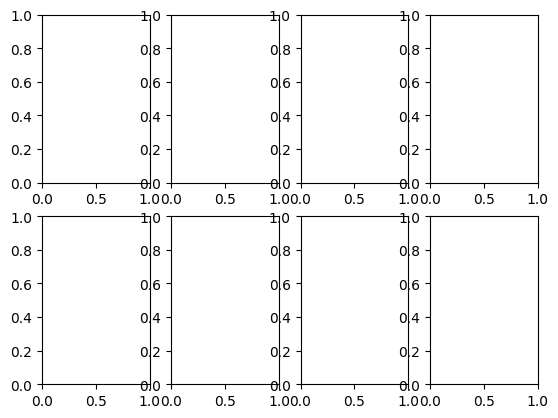

In [14]:
# plotting graphs side by side
plt.subplots(nrows=2, ncols=4)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

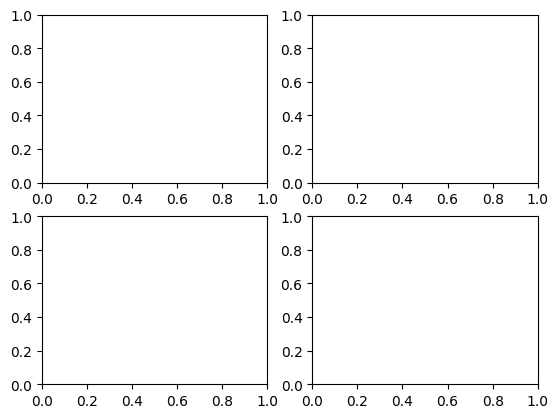

In [15]:
plt.subplots(nrows=2, ncols=2)

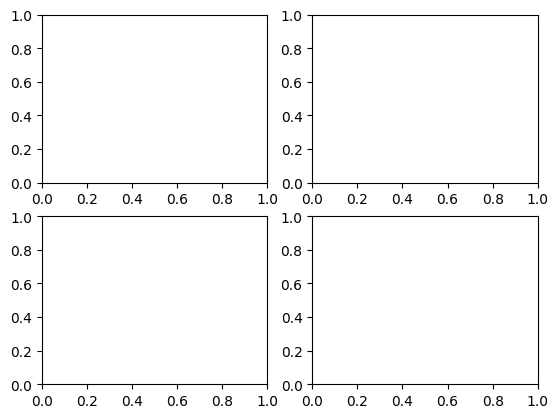

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2)

In [17]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Text(0, 0.5, 'Runs')

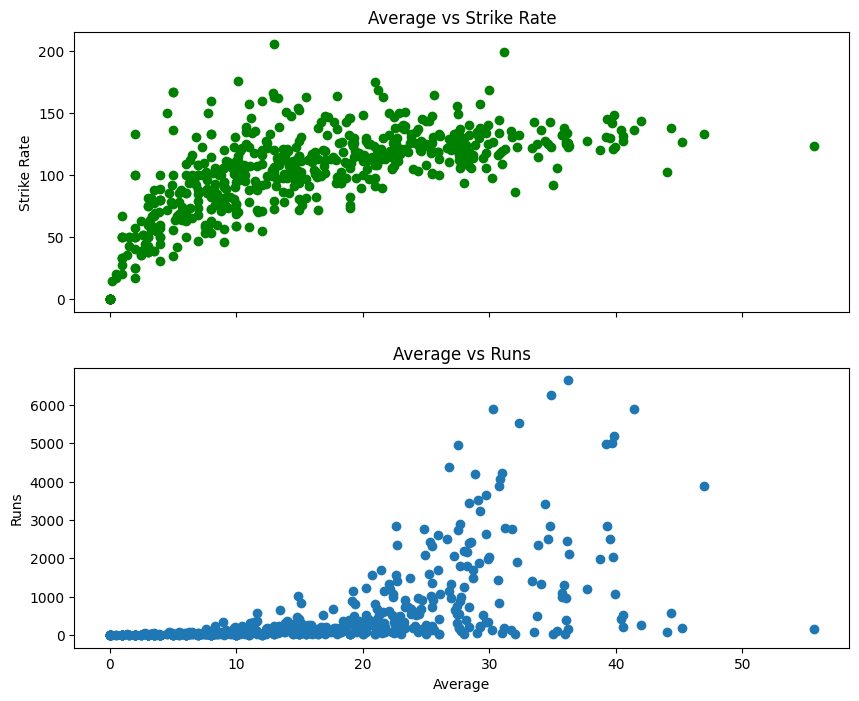

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))

ax[0].scatter(batters['avg'], batters['strike_rate'], color='green')
ax[1].scatter(batters['avg'], batters['runs'])

ax[0].set_title("Average vs Strike Rate")
ax[0].set_ylabel("Strike Rate")

ax[1].set_title("Average vs Runs")
ax[1].set_xlabel("Average") # setting common x-label for both the figs
ax[1].set_ylabel("Runs")

(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

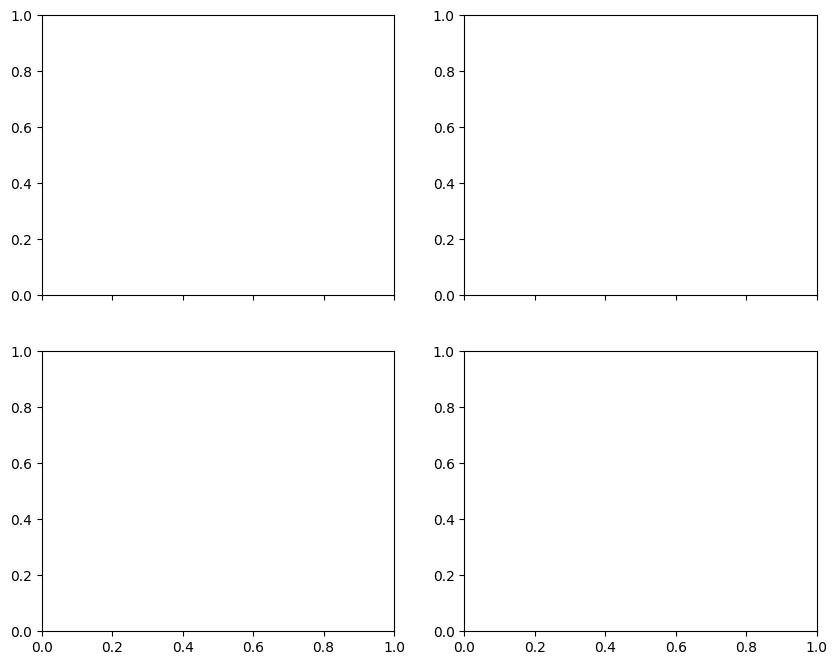

In [19]:
# to observe the dimensionality of the axes array
plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 8))

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

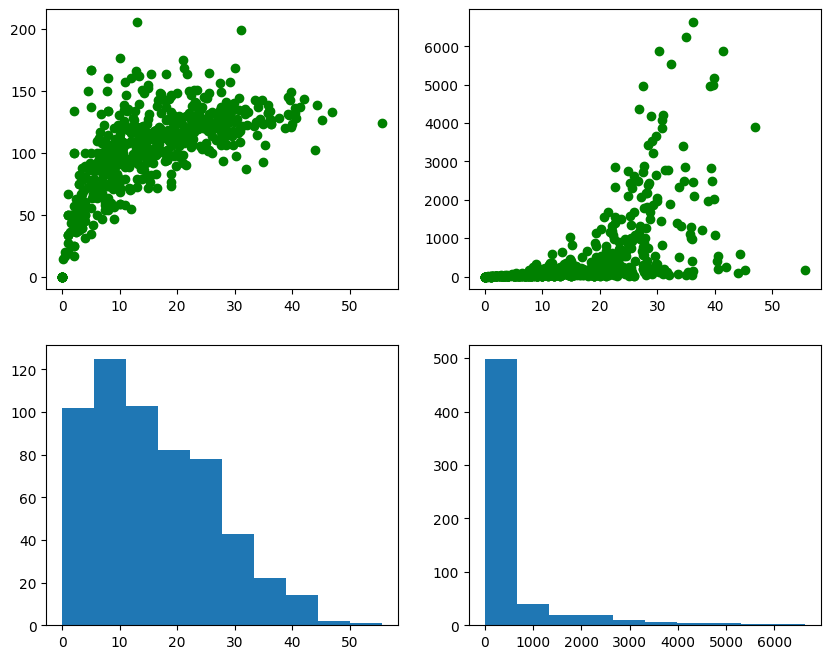

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax[0][0].scatter(batters['avg'], batters['strike_rate'], color='green')
ax[0][1].scatter(batters['avg'], batters['runs'], color='green')
ax[1, 0].hist(batters['avg'])
ax[1, 1].hist(batters['runs'])

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

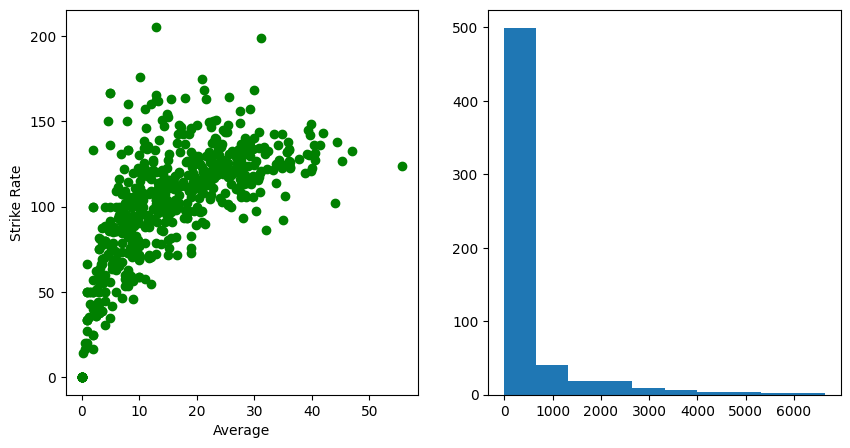

In [21]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(batters['avg'], batters['strike_rate'], color='green')
ax1.set_xlabel("Average")
ax1.set_ylabel("Strike Rate")

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(batters['runs'])

## 3D Plots

3D plots extend the idea of 2D visualizations by adding a **third axis**, allowing us to visualize the relationship among **three numerical variables simultaneously**. In Matplotlib, 3D plotting is handled through a special 3D projection.

---

## 3D Scatter Plots

A 2D scatter plot visualizes the relationship between **two variables**. A **3D scatter plot** goes one step further and visualizes **three variables**, where each point in space represents one observation.

In this example, we use the `batters` dataframe, and each point represents:

* `runs` on the x-axis
* `avg` on the y-axis
* `strike_rate` on the z-axis

```python
fig = plt.figure(figsize=(5, 5))

ax = plt.subplot(projection='3d')
ax.scatter3D(batters['runs'], batters['avg'], batters['strike_rate'])
ax.set_title("Batsman Analysis")
ax.set_xlabel("Runs")
ax.set_ylabel("Average")
ax.set_zlabel("Strike Rate")
```

### Explanation

* `plt.figure()` creates a figure container.
* `plt.subplot(projection='3d')` creates a 3D Axes object.
* `scatter3D()` plots individual data points in 3D space.
* `set_xlabel`, `set_ylabel`, and `set_zlabel` label the three axes.

This type of plot is useful when we want to visually inspect how three numerical features vary together.

---

## 3D Line Plots

A 3D line plot connects points in three-dimensional space, similar to a 2D line plot but with an added dimension.

```python
x = [0, 1, 5]
y = [0, 10, 13]
z = [0, 13, 20]

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot(projection='3d')
ax.scatter3D(x, y, z, color='red')
ax.plot3D(x, y, z)
```

### Explanation

* `plot3D()` draws a line connecting the points `(x, y, z)`
* `scatter3D()` is used here to highlight the actual data points

Although 3D line plots exist, they are **not used very frequently** in practice. This is because interpreting trends in 3D lines can be difficult, and most time-series or ordered data is better represented in 2D.

---

## 3D Surface Plots

3D surface plots are one of the **most important 3D visualizations**, especially in fields like **machine learning and optimization**. They are commonly used to visualize:

* Loss functions
* Cost functions
* Mathematical surfaces

### Example 1: Polynomial surface

```python
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

z = (xx ** 2) + (yy * 2)
z.shape

fig = plt.figure(figsize=(12, 8))

ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx, yy, z, cmap='viridis')
plt.colorbar(p)
```

### Explanation

* `np.linspace()` generates evenly spaced values.
* `np.meshgrid()` converts 1D arrays into 2D grids required for surface plotting.
* `z` is computed as a function of `x` and `y`.
* `plot_surface()` creates a continuous surface instead of individual points.
* `cmap='viridis'` applies a color gradient based on height (z-values).
* `plt.colorbar(p)` shows how colors map to numerical values.

This type of plot is commonly used to visualize how a loss value changes with respect to two parameters.

---

### Example 2: Trigonometric surface

```python
z = np.sin(xx) + np.cos(yy)

fig = plt.figure(figsize=(12, 8))

ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx, yy, z, cmap='viridis')
plt.colorbar(p)
```

### Explanation

Here, the surface represents a **wave-like function** formed by combining sine and cosine values. This example demonstrates how 3D surface plots can be used to visualize complex mathematical relationships in a smooth and interpretable way.

---

### Summary

* **3D Scatter Plot**: Used to visualize relationships among three numerical variables.
* **3D Line Plot**: Exists, but rarely used due to interpretability issues.
* **3D Surface Plot**: Extremely important in machine learning and mathematical modeling, especially for visualizing loss and cost functions.

All 3D plots rely on creating a **3D Axes** using `projection='3d'`, after which plotting functions are applied in three dimensions.

Text(0.5, 0, 'Strike Rate')

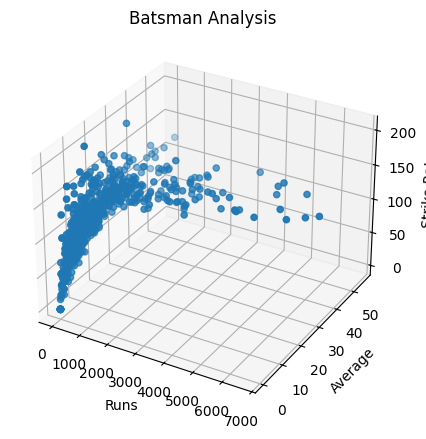

In [22]:
# 3D Scatter Plot
fig = plt.figure(figsize=(5, 5))

ax = plt.subplot(projection = '3d')
ax.scatter3D(batters['runs'], batters['avg'], batters['strike_rate'])
ax.set_title("Batsman Analysis")
ax.set_xlabel("Runs")
ax.set_ylabel("Average")
ax.set_zlabel("Strike Rate")

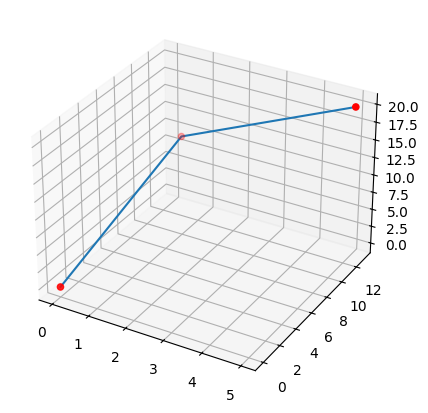

In [23]:
# 3D Line Plot
x = [0, 1, 5]
y = [0, 10, 13]
z = [0, 13, 20]

fig = plt.figure(figsize=(5, 5))

ax = plt.subplot(projection = '3d')
ax.scatter3D(x, y, z, color='red')
ax.plot3D(x, y, z)

In [24]:
# 3D Surface Plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

In [25]:
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((100, 100), (100, 100))

In [26]:
z = (xx ** 2) + (yy ** 2)
z.shape

(100, 100)

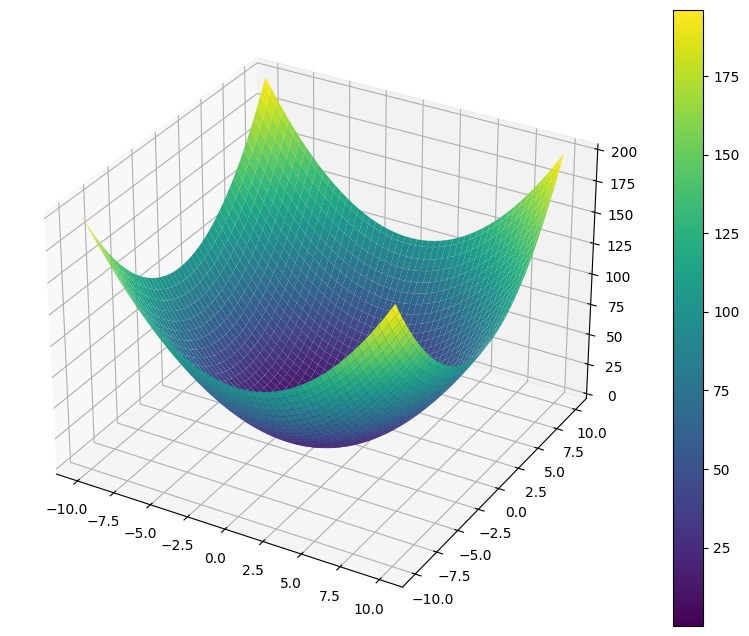

In [27]:
fig = plt.figure(figsize=(12, 8))

ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx, yy, z, cmap='viridis')
plt.colorbar(p)

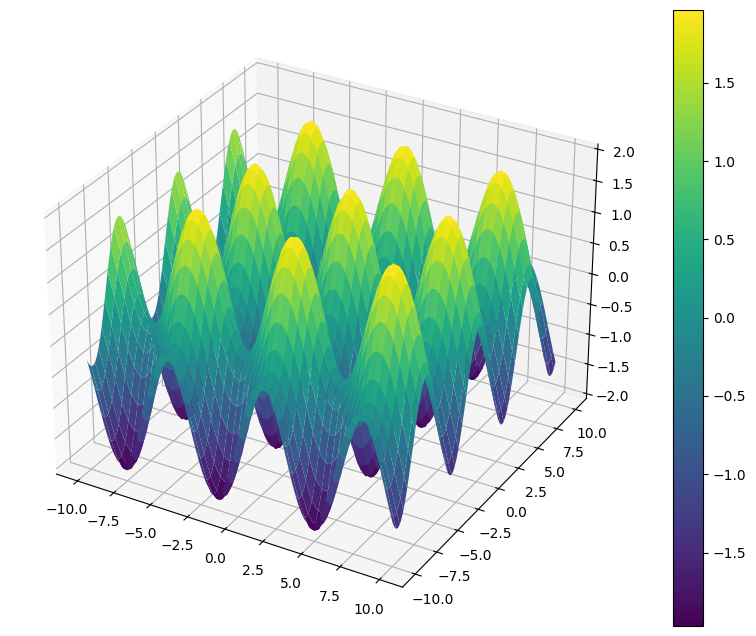

In [28]:
# another 3D Surface Graph
z =  np.sin(xx) + np.cos(yy)

fig = plt.figure(figsize=(12, 8))

ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx, yy, z, cmap='viridis')
plt.colorbar(p)

## Contour Plot

A **contour plot** can be thought of as the **2D representation of a 3D surface plot**. Instead of showing height using a third axis (z-axis), it represents the z-values using **color gradients and contour lines** on a 2D plane.

Just like in a 3D surface plot:

* **Higher values** are represented by lighter or brighter colors (for example, yellow).
* **Lower values** are represented by darker colors (for example, purple).

This makes contour plots especially useful when we want to understand the distribution and variation of a function without dealing with 3D rotation and perspective.

```python
# Contour Plot
fig = plt.figure()

ax = plt.subplot()

c = ax.contour(xx, yy, z, cmap='viridis')
fig.colorbar(c)
```

### Explanation

* `ax.contour()` draws contour lines that connect points of equal z-value.
* `xx` and `yy` represent the grid created using `meshgrid`.
* `z` contains the corresponding height (or intensity) values.
* `cmap='viridis'` applies a color gradient to distinguish different contour levels.
* `fig.colorbar(c)` adds a color scale, helping interpret which colors correspond to higher or lower values.

---

### Filled Contour Plot (`contourf`)

A more visually intuitive and commonly used version of a contour plot is the **filled contour plot**. Instead of just drawing contour lines, it **fills the regions between contours with color**, making the plot easier to interpret.

To create a filled contour plot, we simply replace `contour` with `contourf`:

```python
ax.contourf(xx, yy, z, cmap='viridis')
```

In a `contourf` plot:

* The entire 2D region is filled with color.
* Color transitions smoothly represent changes in z-values.
* It provides a clearer sense of gradients and regions compared to line-based contours.

Contour and filled contour plots are widely used in data science, physics, and machine learning to visualize functions, probability distributions, and loss landscapes in two dimensions.

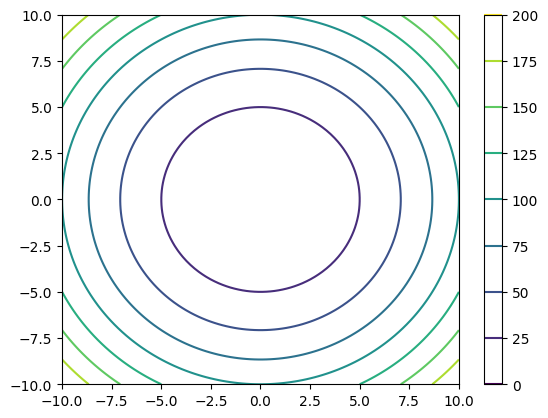

In [31]:
# Contour Plot
z = (xx ** 2) + (yy ** 2)

fig = plt.figure()

ax = plt.subplot()

c = ax.contour(xx, yy, z, cmap='viridis')
fig.colorbar(c)

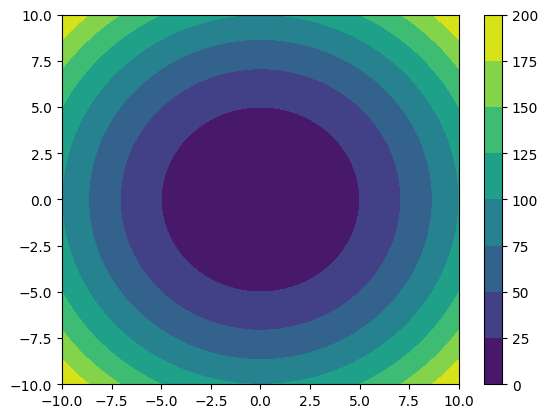

In [32]:
# Contour Plot
fig = plt.figure()

ax = plt.subplot()

c = ax.contourf(xx, yy, z, cmap='viridis')
fig.colorbar(c)

## Heatmap

A **heatmap** is a data visualization technique used to represent values in a **matrix or grid format**, where each cell is colored according to its value.
Different **shades or intensities of color** represent different magnitudes of data, typically ranging from **low values to high values**. This makes heatmaps very effective for quickly spotting patterns, concentrations, and variations in large datasets.

Heatmaps are commonly used in:

* Correlation analysis
* Time-based or position-based data
* Sports analytics, system monitoring, and machine learning visualizations

---

### Understanding the code step by step

```python
delivery = pd.read_csv("datasets/IPL_Ball_by_Ball_2008_2022.csv")
delivery
```

Here, we load the IPL ball-by-ball dataset into a DataFrame named `delivery`.

---

```python
delivTemp_df = delivery[
    (delivery['ballnumber'].isin([1, 2, 3, 4, 5, 6])) &
    (delivery['batsman_run'] == 6)
]
delivTemp_df
```

In this step:

* We filter only **legal balls** in an over (`ballnumber` from 1 to 6).
* We further filter rows where the batsman scored **exactly 6 runs**.
* The resulting DataFrame contains only the balls where a six was hit.

---

```python
grid = delivTemp_df.pivot_table(
    index='overs',
    columns='ballnumber',
    values='batsman_run',
    aggfunc='count'
)
grid
```

Here, we reshape the data into a **2D grid**:

* `index='overs'` → rows represent over numbers.
* `columns='ballnumber'` → columns represent ball numbers within each over.
* `values='batsman_run'` → values to aggregate.
* `aggfunc='count'` → counts how many sixes were hit for each over–ball combination.

This pivot table is the ideal structure for a heatmap.

---

### Visualizing the heatmap

```python
plt.imshow(grid)
```

* `plt.imshow()` converts the grid into an image-like representation where each cell is colored based on its value.

---

```python
plt.xticks(np.arange(0, 6), list(range(1, 7)))
```

* Sets custom labels for the x-axis.
* Maps column positions (0 to 5) to actual ball numbers (1 to 6).

---

```python
plt.yticks(delivery['overs'].unique(), list(range(1, 21)))
```

* Sets y-axis labels to represent overs (1 to 20).
* Aligns over numbers with their corresponding rows in the heatmap.

---

```python
plt.colorbar()
```

* Adds a color scale to the plot.
* Helps interpret what each color intensity represents in terms of count (number of sixes).

---

### Final Interpretation

The resulting heatmap shows:

* **Overs on the y-axis**
* **Ball numbers within an over on the x-axis**
* **Color intensity representing the frequency of sixes**

Darker or more intense colors indicate **few or no sixes**, while lighter colors indicate **higher counts of sixes**. This allows us to quickly identify which overs and ball numbers are most likely to see six-hitting behavior.


In [33]:
delivery = pd.read_csv("datasets/IPL_Ball_by_Ball_2008_2022.csv")
delivery

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [ ]:
delivTemp_df = delivery[(delivery['ballnumber'].isin([1, 2, 3, 4, 5, 6])) & (delivery['batsman_run'] == 6)]
delivTemp_df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
16,1312200,1,2,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
22,1312200,1,3,5,YBK Jaiswal,Yash Dayal,JC Buttler,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
103,1312200,1,17,2,TA Boult,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
107,1312200,1,17,6,OC McCoy,R Sai Kishore,R Parag,NaN,6,0,6,0,0,NaN,NaN,NaN,Rajasthan Royals
142,1312200,2,3,5,MS Wade,M Prasidh Krishna,Shubman Gill,NaN,6,0,6,0,0,NaN,NaN,NaN,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225848,335982,1,19,2,BB McCullum,P Kumar,Mohammad Hafeez,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225852,335982,1,19,6,BB McCullum,P Kumar,Mohammad Hafeez,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225882,335982,2,4,4,JH Kallis,AB Agarkar,W Jaffer,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225932,335982,2,12,1,P Kumar,LR Shukla,Z Khan,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [39]:
grid = delivTemp_df.pivot_table(index='overs', columns='ballnumber', values='batsman_run', aggfunc='count')
grid

ballnumber,1,2,3,4,5,6
overs,,,,,,
0,9,17,31,39,33,27
1,31,40,49,56,58,54
2,75,62,70,72,58,76
3,60,74,74,103,74,71
4,71,76,112,80,81,72
5,77,102,63,86,78,80
6,34,56,49,59,64,38
7,59,62,73,70,69,56
8,86,83,79,81,73,52


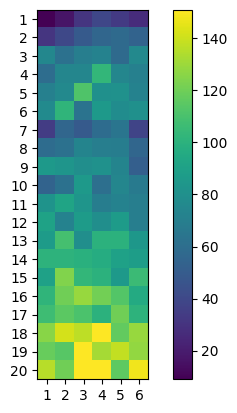

In [62]:
# representing the above grid using heatmap
plt.imshow(grid)
plt.xticks(np.arange(0, 6), list(range(1, 7)))
plt.yticks(delivery['overs'].unique(), list(range(1, 21)))
plt.colorbar()

## Pandas `plot()`

The **`plot()` function in pandas** is a high-level plotting interface that allows us to create visualizations **directly from Series and DataFrames**.
Internally, it is **built on top of Matplotlib**, which means every pandas plot is ultimately a Matplotlib plot.

### Why use `pandas.plot()`?

* It makes plotting **very easy and concise**
* Works naturally with pandas objects (Series, DataFrame, index, columns)
* Automatically handles labels, legends, and axes
* Ideal for **quick exploratory data analysis (EDA)**

### Downsides

* Limited customization compared to raw Matplotlib
* Fine-grained control (ticks, annotations, layouts) is harder
* Not suitable for very complex or publication-quality plots

---

## Pandas Pie Chart

A pie chart using pandas can be created directly from a Series.

```python
s = pd.Series([1, 2, 3, 4, 5, 6, 7])
s.plot(kind='pie')
```

Here:

* The values of the Series are converted into pie sectors
* The total sum is treated as 100%
* Each value gets a proportional slice of the pie

---

## Pandas Scatter Plot

Using the **`tips` dataset** from seaborn:

```python
tips.plot(
    kind='scatter',
    x='total_bill',
    y='tip',
    title='Cost Analysis',
    marker='.',
    figsize=(8, 5),
    c='sex',
    cmap='summer'
)
```

Explanation:

* `kind='scatter'` → creates a scatter plot
* `x` and `y` define the axes
* `marker='.'` changes the point style
* `figsize` controls plot size
* `c='sex'` assigns colors based on a column
* `cmap='summer'` applies a colormap

This shows that many **Matplotlib features can be accessed directly through pandas**.

---

## Pandas Line Plot

```python
stocks = pd.read_csv("https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/weekly_stocks.csv")
stocks.head()
```

### Line plot of a single column

```python
stocks['MSFT'].plot(kind='line')
```

This plots the Microsoft stock values over time using the index.

---

### Line plot of all columns

```python
stocks.plot(kind='line', x='Date')
```

* `Date` becomes the x-axis
* All remaining numeric columns are plotted as separate lines
* A legend is automatically added

---

## Pandas Bar Charts

```python
batsmen = pd.read_csv("datasets/batsman_season_record.csv")
batsmen
```

### Bar chart for all years

```python
batsmen.set_index('batsman').plot(kind='bar', colormap='summer')
```

* `batsman` becomes the x-axis
* Each year is plotted as a separate bar group
* `colormap` controls color styling

---

### Bar chart for a single year

```python
batsmen.set_index('batsman')['2015'].plot(kind='bar', x='batsman')
```

Only the 2015 season data is visualized.

---

### Stacked Bar Chart

```python
batsmen.set_index('batsman').plot(kind='bar', stacked=True)
```

* Bars are stacked vertically
* Shows both **total contribution** and **individual year-wise contribution**

---

## Pandas Histogram

```python
stocks.plot(kind='hist')
```

This:

* Plots histograms for **all numeric columns**
* Automatically overlays multiple histograms
* Adds a legend for column identification

---

## Pandas Subplots

```python
stocks.plot(kind='line', subplots=True)
```

Here:

* Each column is plotted in a **separate subplot**
* All subplots appear in the same figure
* Useful for comparing trends independently

---

## A Complex Line Graph Example

```python
tips.pivot_table(
    index=['day', 'time'],
    columns=['sex', 'smoker'],
    values='total_bill',
    aggfunc='mean',
    observed=False
).plot(kind='line')
```

Explanation:

* Data is first reshaped using `pivot_table`
* Mean total bill is calculated for combinations of:

  * day
  * time
  * sex
  * smoker
* The resulting DataFrame is plotted as a line chart
* Multiple lines represent different category combinations

This example highlights how **powerful pandas plotting becomes when combined with groupby and pivot operations**, even though it is still backed by Matplotlib.

<Axes: >

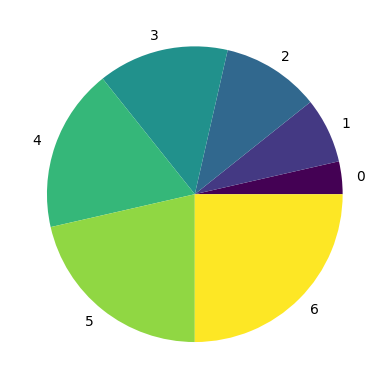

In [66]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7])
s.plot(kind='pie', colormap='viridis')

In [67]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: title={'center': 'Cost Analysis'}, xlabel='total_bill', ylabel='tip'>

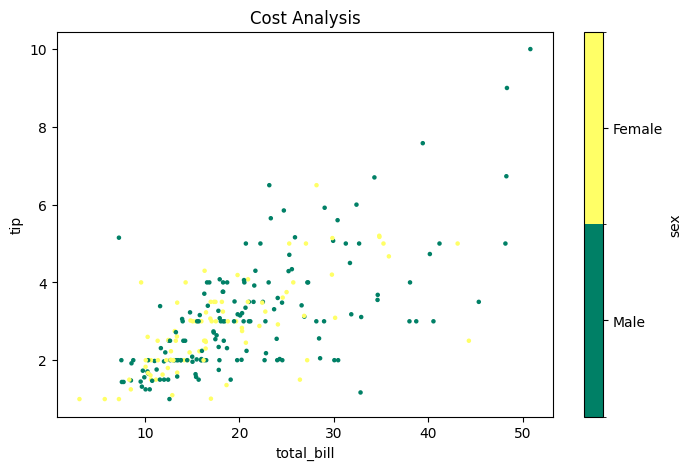

In [85]:
# scatter plot using pandas plot
tips.plot(kind='scatter', x='total_bill', y='tip', title='Cost Analysis', marker='.', figsize=(8, 5), c='sex', cmap='summer')

In [87]:
stocks = pd.read_csv("https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/weekly_stocks.csv")
stocks.head()

,Date,MSFT,FB,AAPL
0,2021-05-24,249.679993,328.730011,124.610001
1,2021-05-31,250.789993,330.350006,125.889999
2,2021-06-07,257.890015,331.260010,127.349998
3,2021-06-14,259.429993,329.660004,130.460007
4,2021-06-21,265.019989,341.369995,133.110001


<Axes: >

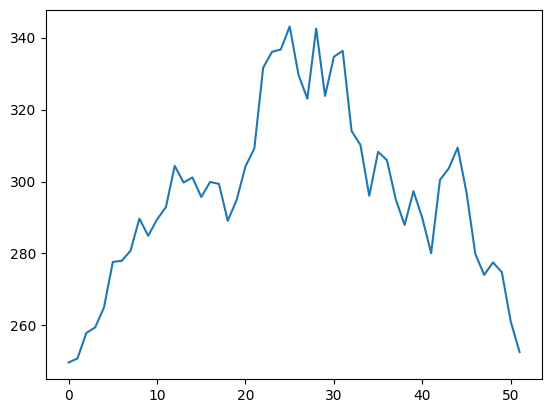

In [ ]:
# pandas line plot
stocks['MSFT'].plot(kind='line')

<Axes: xlabel='Date'>

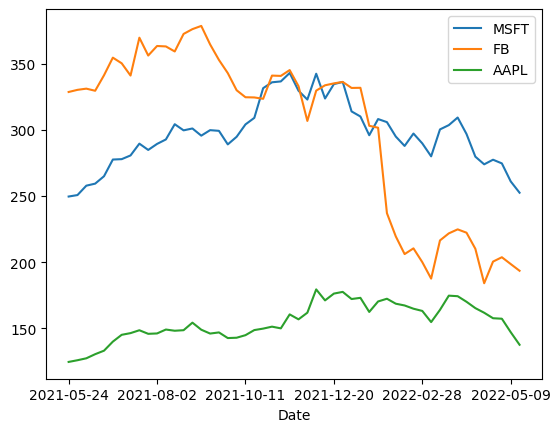

In [ ]:
# pandas plot on all columns
stocks.plot(kind='line', x='Date')

<Axes: xlabel='Date'>

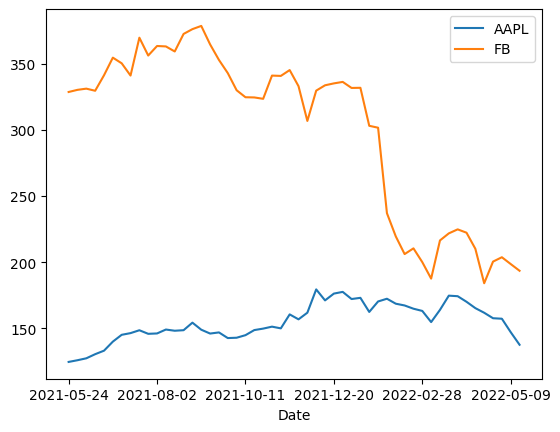

In [ ]:
# pandas plot on selective columns
stocks[['Date', 'AAPL', 'FB']].plot(kind='line', x='Date')

In [103]:
# bar chart
batsmen = pd.read_csv("datasets/batsman_season_record.csv")
batsmen

,batsman,2015,2016,2017
0,AB de Villiers,513,687,216
1,DA Warner,562,848,641
2,MS Dhoni,372,284,290
3,RG Sharma,482,489,333
4,V Kohli,505,973,308


<Axes: xlabel='batsman'>

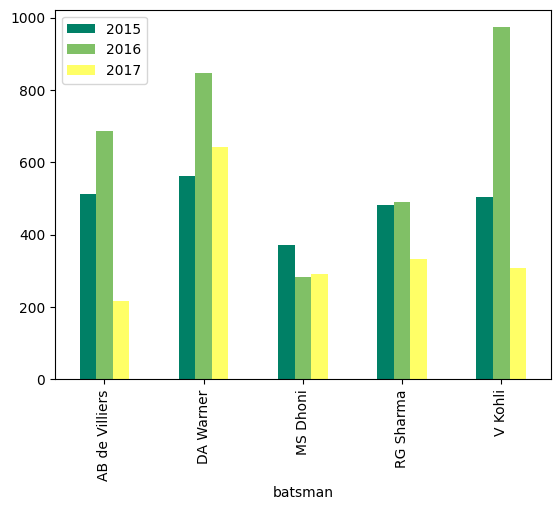

In [122]:
batsmen.set_index('batsman').plot(kind='bar', colormap='summer')

<Axes: xlabel='sex'>

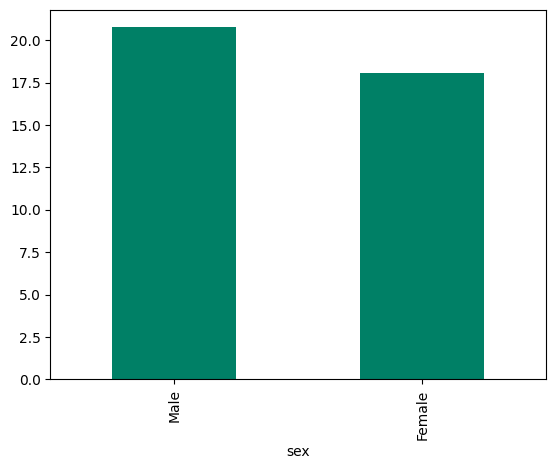

In [110]:
tips.groupby('sex', observed=False)['total_bill'].mean().plot(kind='bar', colormap='summer')

<Axes: xlabel='batsman'>

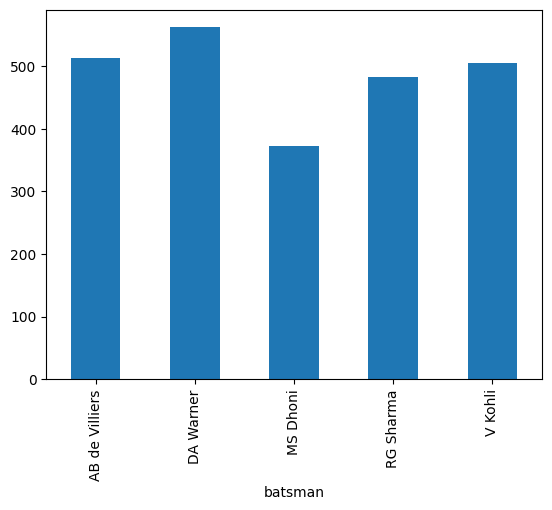

In [ ]:
batsmen.set_index('batsman')['2015'].plot(kind='bar', x='batsman')

<Axes: xlabel='batsman'>

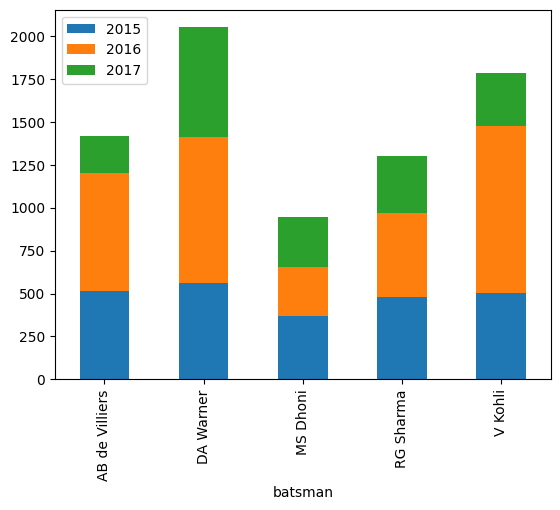

In [ ]:
# stacked bar chart
batsmen.set_index('batsman').plot(kind='bar', stacked=True)

<Axes: ylabel='Frequency'>

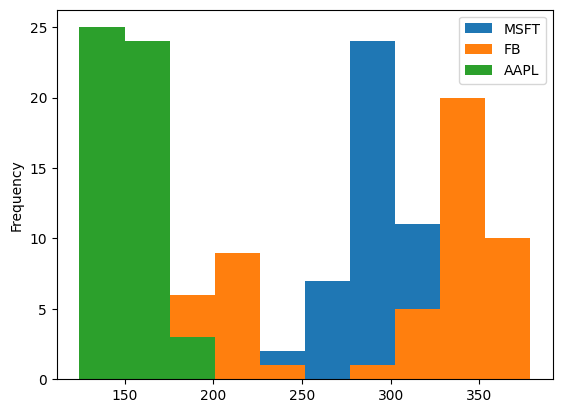

In [127]:
# pandas histogram

stocks.plot(kind='hist')

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

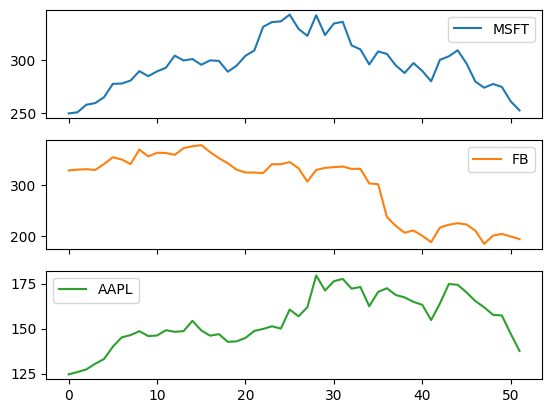

In [129]:
# multiple seperate plots (subplots) in the same figure
stocks.plot(kind='line', subplots=True)

<Axes: xlabel='day,time'>

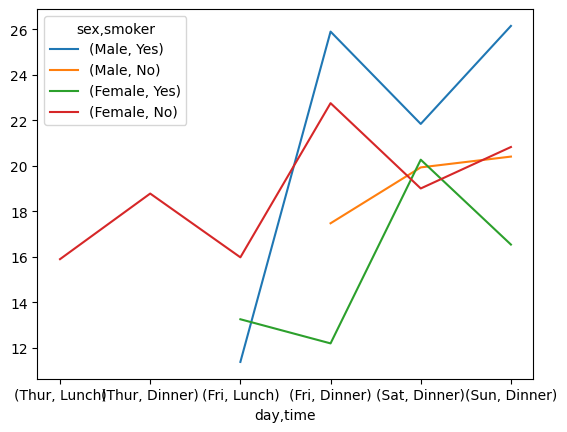

In [134]:
tips.pivot_table(index=['day', 'time'], columns=['sex', 'smoker'], values='total_bill', aggfunc='mean', observed=False).plot(kind='line') # subplots can be created by setting subplots=True in plot as param